In [2]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
import urllib.request

In [3]:
df = pd.read_csv("./data/train.csv", index_col = 'laptop_ID')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [21]:
df.sample(20)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
1007,Lenovo,ThinkPad T560,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.3kg,1349.00
831,Lenovo,Thinkpad X1,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.13kg,2499.00
1215,Asus,Rog G752VY-GC229T,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.3kg,2150.00
732,MSI,GL72M 7REX,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.7kg,1348.48
613,Toshiba,Tecra Z50-C-144,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1399.00
309,Asus,GL553VE-FY082T (i7-7700HQ/8GB/1TB,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5kg,1265.00
891,HP,EliteBook x360,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.28kg,1700.00
1287,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32
339,Lenovo,V310-15ISK (i3-6006U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 520,Windows 10,1.85kg,449.00


In [5]:
import tool_box as tb

In [8]:
tb.describe_df(df)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
DATA_TYPE,object,object,object,float64,object,object,object,object,object,object,object,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,19,480,6,17,36,107,9,37,93,9,165,603
CARDIN (%),2.08,52.63,0.66,1.86,3.95,11.73,0.99,4.06,10.2,0.99,18.09,66.12


In [ ]:
a = df.loc[df, "ScreenResolution"].split(" ")
b = a[-1].split("x")
print(b)


['1920', '1080']


In [41]:
c = int(b[0])* int(b[1])
print(c)

2073600


In [47]:
lista = []
for x in df['ScreenResolution']:
    a = x.split(" ")
    b = a[-1].split('x')
    c = int(b[0])*int(b[1])
    lista.append(c)

In [48]:
df['pixel'] = lista
df.head(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,pixel
laptop_ID,,,,,,,,,,,,,
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,2073600
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,2073600
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,2073600
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1296000
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,2073600
627,HP,ProBook 650,Notebook,14.0,1366x768,Intel Core i5 7300U 2.6GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.31kg,1124.00,1049088
142,HP,Envy 13-AD007nv,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg,699.00,2073600
19,Lenovo,IdeaPad 320-15IKB,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 940MX,No OS,2.2kg,499.00,2073600
732,MSI,GL72M 7REX,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.7kg,1348.48,2073600


In [49]:
X = df.drop(['Price_in_euros'], axis=1)
y = df['Price_in_euros'].copy()
X.shape

(912, 12)

In [78]:
train_set, test_set = train_test_split(df, test_size = 0.20, random_state = 42)

In [51]:
target = 'Price_in_euros'

In [79]:
train_set['ram_GB']=train_set.Ram.str.replace("GB", "").astype(int)
train_set['weight_kg']=train_set.Weight.str.replace("kg", "").astype(float)
test_set['ram_GB']=test_set.Ram.str.replace("GB", "").astype(int)
test_set['weight_kg']=test_set.Weight.str.replace("kg", "").astype(float)

In [80]:
train_set.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,pixel,ram_GB,weight_kg
laptop_ID,,,,,,,,,,,,,,,
1118,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,AMD FirePro W6150M,Windows 7,3.0kg,2899.00,2073600,8,3.00
153,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56kg,1249.26,2073600,16,2.56
275,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8GB,512GB SSD,Intel Iris Graphics 550,macOS,1.37kg,1958.90,4096000,8,1.37
1100,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,1.54kg,1030.99,2073600,4,1.54
131,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.8kg,1396.00,2073600,16,2.80


In [81]:
feat_num = train_set.describe().columns.to_list()

In [101]:
feat_num

['Inches', 'Price_in_euros', 'pixel', 'ram_GB', 'weight_kg']

In [88]:
df_copia = train_set.reset_index(drop=True)

In [90]:
df_copia

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,pixel,ram_GB,weight_kg
0,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,AMD FirePro W6150M,Windows 7,3.0kg,2899.00,2073600,8,3.00
1,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56kg,1249.26,2073600,16,2.56
2,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8GB,512GB SSD,Intel Iris Graphics 550,macOS,1.37kg,1958.90,4096000,8,1.37
3,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,1.54kg,1030.99,2073600,4,1.54
4,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.8kg,1396.00,2073600,16,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,HP,14-am079na (N3710/8GB/2TB/W10),Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8GB,2TB HDD,Intel HD Graphics 405,Windows 10,1.94kg,389.00,1049088,8,1.94
725,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,549.00,2073600,6,2.20
726,Dell,Latitude 7280,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg,1859.00,2073600,16,1.18
727,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2.2kg,306.00,1049088,4,2.20


In [91]:
tb.get_features_num_regression(df_copia, train_set['Price_in_euros'], 0.1)

¡Lo siento, la columna 'laptop_ID
1118    2899.00
153     1249.26
275     1958.90
1100    1030.99
131     1396.00
         ...   
578      389.00
996      549.00
770     1859.00
407      306.00
418     1943.00
Name: Price_in_euros, Length: 729, dtype: float64' no existe! Revisa que esté bien escrita


In [97]:
target_col = 'Price_in_euros'

(['Inches', 'pixel', 'ram_GB', 'weight_kg'],
 <Figure size 1000x1000 with 2 Axes>)

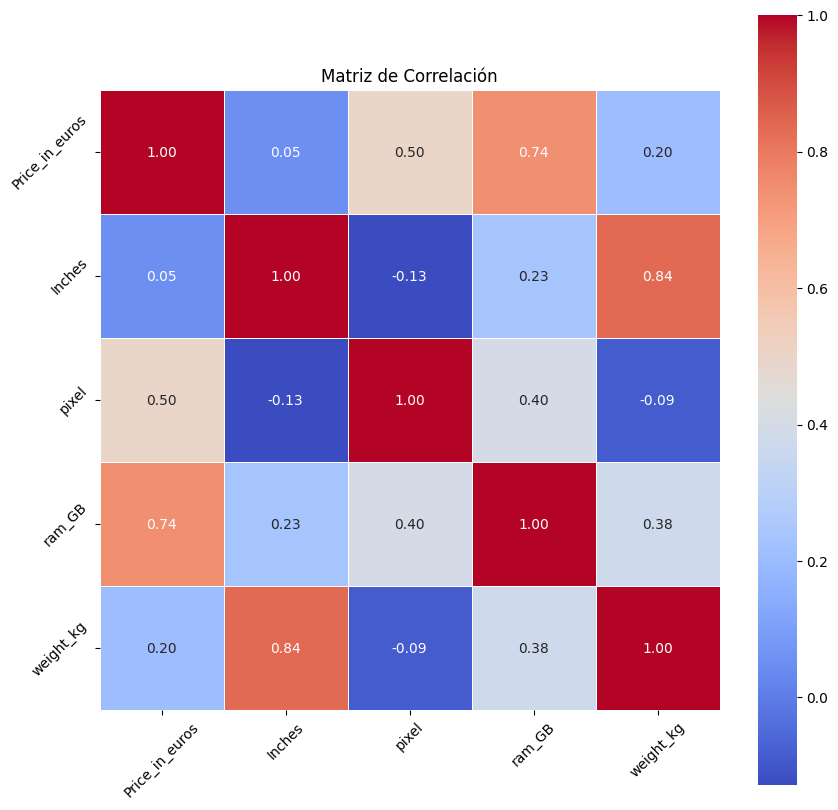

In [100]:
tb.get_features_num_regression(df_copia, target_col, 0.0)

In [99]:
train_set

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,pixel,ram_GB,weight_kg
laptop_ID,,,,,,,,,,,,,,,
1118,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,AMD FirePro W6150M,Windows 7,3.0kg,2899.00,2073600,8,3.00
153,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56kg,1249.26,2073600,16,2.56
275,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8GB,512GB SSD,Intel Iris Graphics 550,macOS,1.37kg,1958.90,4096000,8,1.37
1100,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,1.54kg,1030.99,2073600,4,1.54
131,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.8kg,1396.00,2073600,16,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,HP,14-am079na (N3710/8GB/2TB/W10),Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8GB,2TB HDD,Intel HD Graphics 405,Windows 10,1.94kg,389.00,1049088,8,1.94
996,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,549.00,2073600,6,2.20
770,Dell,Latitude 7280,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg,1859.00,2073600,16,1.18


In [ ]:
for a in train_set.Company():    
    for x in train_set.Company.value_counts():
        if x < 10:
            train_set[]

Company
Lenovo       False
Dell         False
HP           False
Asus         False
Acer         False
Toshiba      False
MSI          False
Apple        False
Mediacom      True
Razer         True
Xiaomi        True
Samsung       True
Microsoft     True
Google        True
Fujitsu       True
Vero          True
Chuwi         True
Name: count, dtype: bool

In [104]:
train_set = pd.get_dummies(train_set, columns=['OpSys'], dtype = int)
test_set = pd.get_dummies(test_set, columns=['OpSys'], dtype = int)

In [126]:
test_set

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,...,ram_GB,weight_kg,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
laptop_ID,,,,,,,,,,,,,,,,,,,,,
451,HP,Omen 15-AX205na,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,2.2kg,...,8,2.20,0,0,0,0,1,0,0,0
802,Lenovo,Yoga 510-15IKB,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,AMD Radeon R7 M460,2.08kg,...,8,2.08,0,0,0,0,1,0,0,0
723,Lenovo,Thinkpad E470,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 920MX,1.87kg,...,8,1.87,0,0,0,0,1,0,0,0
682,HP,Pavilion X360,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4GB,128GB SSD,Nvidia GeForce 940MX,1.63kg,...,4,1.63,0,0,0,0,1,0,0,0
1306,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,2.2kg,...,4,2.20,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,1.86kg,...,8,1.86,0,0,0,0,1,0,0,0
626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,1.25kg,...,4,1.25,0,1,0,0,0,0,0,0
416,Lenovo,Lenovo IdeaPad,Notebook,11.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,2GB,32GB Flash Storage,Intel HD Graphics 500,1.15kg,...,2,1.15,0,0,0,0,1,0,0,0


In [130]:
feat_num = train_set.describe().columns.to_list()

In [131]:
feat_num

['Inches',
 'Price_in_euros',
 'pixel',
 'ram_GB',
 'weight_kg',
 'OpSys_Android',
 'OpSys_Chrome OS',
 'OpSys_Linux',
 'OpSys_Mac OS X',
 'OpSys_No OS',
 'OpSys_Windows 10',
 'OpSys_Windows 10 S',
 'OpSys_Windows 7',
 'OpSys_macOS']

- feat_num contiene las columnas numericas transformadas de 'inches', 'pixel'(multiplicacion resolutionScreen), 'ram_gb, 'weight_kg', el one hot encoding de la categoriga OpSys.

In [133]:
feat_num.pop(1)

'Price_in_euros'

In [134]:
feat_num.remove('OpSys_Mac OS X')

In [135]:
feat_num

['Inches',
 'pixel',
 'ram_GB',
 'weight_kg',
 'OpSys_Android',
 'OpSys_Chrome OS',
 'OpSys_Linux',
 'OpSys_No OS',
 'OpSys_Windows 10',
 'OpSys_Windows 10 S',
 'OpSys_Windows 7',
 'OpSys_macOS']

In [136]:
X_train = train_set[feat_num]
y_train = train_set[target_col]
X_test = test_set[feat_num]
y_test = test_set[target_col]


In [139]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

In [192]:
model_names = ["Regresion Lineal","Random Forest","XGBoost","LightGBM"]
dtr_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
rf_reg = RandomForestRegressor(max_depth=10, random_state= 42)
xgb_reg = XGBRegressor(random_state = 42)
lgb_reg = LGBMRegressor(random_state= 42, verbose = -100)


model_set = [dtr_reg, rf_reg, xgb_reg, lgb_reg]

In [193]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "neg_mean_squared_error")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

DecisionTreeRegressor(max_depth=10, random_state=42)
RandomForestRegressor(max_depth=10, random_state=42)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
LGBMRegressor(random_state=42, verbose=-100)


In [194]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, RMSE_CV: {np.sqrt(-np.mean(valores))}")
print(f"El ganador es {ganador}")

Model <Regresion Lineal>, RMSE_CV: 395.6036632787713
Model <Random Forest>, RMSE_CV: 366.6719202589069
Model <XGBoost>, RMSE_CV: 382.7588142810852
Model <LightGBM>, RMSE_CV: 366.0381407182138
El ganador es LightGBM


In [186]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [197]:


param_random= {'max_depth': [3, 6, 12],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          'bagging_fraction': [0.3,0.6,1],
          'feature_fraction': [0.5,1],
          'n_estimators': [100, 250, 500, 750],
          'max_bins': [125,250]
          }

lgb_random = RandomizedSearchCV(lgb_reg, 
                               cv = 3,
                               n_iter = 20,
                               param_distributions= param_random, 
                               scoring = "neg_mean_squared_error")


lgb_random.fit(X_train, y_train)
print("LGB best_score:", np.sqrt(-lgb_random.best_score_))

LGB best_score: 368.00990351445927


In [198]:
y_pred_random = lgb_random.best_estimator_.predict(X_test)
print("MAE:", mean_absolute_error(y_test,y_pred_random))
print("MAPE:", mean_absolute_percentage_error(y_test,y_pred_random))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_random)))

MAE: 259.02301041671313
MAPE: 0.2631059236639011
RMSE: 374.46803316329715


In [195]:
param_grid= {'max_depth': [3, 6, 12],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          'bagging_fraction': [0.3,0.6,1],
          'feature_fraction': [0.5,1],
          'n_estimators': [100, 250, 500, 750],
          'max_bins': [125,250]
          }
lgb_grid = GridSearchCV(lgb_reg, 
                            cv = 3,
                            param_grid= param_grid, 
                            scoring = "neg_mean_squared_error",
                            n_jobs=-1)


lgb_grid.fit(X_train, y_train)
print("LGB best_score:", np.sqrt(-lgb_grid.best_score_))

LGB best_score: 364.9246502730569


In [196]:
y_pred = lgb_grid.best_estimator_.predict(X_test)
print("MAE:", mean_absolute_error(y_test,y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 264.22229542651996
MAPE: 0.26996832815439464
RMSE: 381.7324706318
